Background on Neural Networks
http://ufldl.stanford.edu/wiki/index.php/Neural_Networks

This Tutorial comes from:
https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow

https://github.com/wagonhelm/NaNmnist

Convolution background:
http://colah.github.io/posts/2014-07-Conv-Nets-Modular/

Convolutional Neural Networks background
http://colah.github.io/posts/2014-07-Understanding-Convolutions/

LSTM Networks overview:
http://colah.github.io/posts/2015-08-Understanding-LSTMs/

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


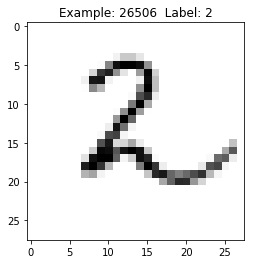

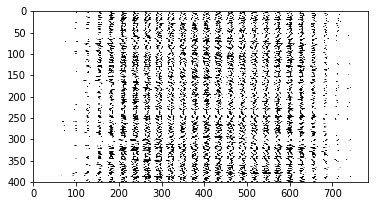

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)
[[ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 ..., 
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]]
Training Step:0  Accuracy =  0.5988  Loss = 2.1882
Training Step:100  Accuracy =  0.8647  Loss = 0.580297
Training Step:200  Accuracy =  0.879  Loss = 0.459822
Training Step:300  Accuracy =  0.8866  Loss = 0.408572
Training Step:400  Accuracy =  0.8904  Loss = 0.378081
Training Step:500  Accuracy =  0.8943  Loss = 0.356976
Training Step:600  Accuracy =  0.8974  Loss = 0.34105
Training Step:700  Accuracy =  0.8984 

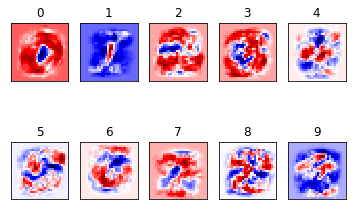

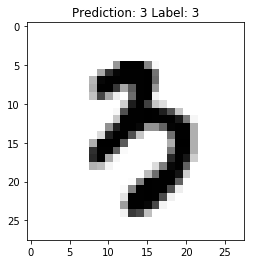

In [2]:
## Basic machine learning tutorial
# MNIST data set
# Softmax layer with bias
# contains visualizations of input data and Weights corresponding to each output label



def TRAIN_SIZE(num): # Displays info about training image data
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num): # Displays info about test image data
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test	
    
    
def display_digit(num): # Displays input image (has to reshape from single 784 ln vector 
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop): # Displays several example vectors of raw input images
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    # THIS GETS OUR PREDICTION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax()
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()
    

    
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) 

import matplotlib.pyplot as plt
import numpy as np
import random as ran


## this uses known info on the size of the training data set and the size 
# of each image in that training set
x_train, y_train = TRAIN_SIZE(55000)


display_digit(ran.randint(0, x_train.shape[0]))
display_mult_flat(0,400)


import tensorflow as tf
sess = tf.Session()
x = tf.placeholder(tf.float32, shape=[None, 784]) #input placeholder
y_ = tf.placeholder(tf.float32, shape=[None, 10]) #correct class placeholder
W = tf.Variable(tf.zeros([784,10])) #Initialize Weights
b = tf.Variable(tf.zeros([10])) # Initialize Biases


y = tf.nn.softmax(tf.matmul(x,W) + b) # Classifier function (fairly simple in this case)
# Softmax on the input*Weight + bias

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
#Defines loss function (this is something I still need to work to understand)

x_train, y_train = TRAIN_SIZE(5500)
x_test, y_test = TEST_SIZE(10000)
batch_size = 100
LEARNING_RATE = 0.1
TRAIN_STEPS = 2500

init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(y, feed_dict={x: x_train}))


training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
# This uses the "gradient descent optimizer" with the given learning rate on the defined
# loss function (cross_entropy)


correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0: # % is the modolo operand (so every 100 trials print)
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))


# !!!! This doesn't use batches, also it doesn't have a save for when loss continues 
# decreasing but accuracy starts decreasing too! How is this possible you ask? Accuracy is
# calculated on the test data whereas loss is calculated from the training data (so if 
# loss keeps dropping but accuracy starts dropping too you might have some overfitting 
# happening)


# The code below plots the weights associated with each output (recall the size of the W
# matrix is input size by output size, so for each possible output there is a 784 size 
# vector, each element corresponding to a pixel of an image). Each of those elements 
# feeds to a possible output. Certain values in certain pixels that are more likely to
# be found in certain categories increase the relevant value of the output layer, whereas
# values unlikely to be found in certain pixels for certain numbers decrease the relevant
# value of the output layer

# below we see the 10 different 784 element vectors (one for each output) reshaped to match
# the origianl image shape. Red shows positive effect on output, blue negative
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]),
    cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()  #I think this initializes the frame1 parameter set
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    
plt.show() #Careful not to have this in the for loop!





## Using the model

# This runs one example through our trained classifier, gets the probabilistic softmax 
# output, and then takes the max to make a prediction about which number it's looking at
#x_train, y_train = TRAIN_SIZE(1)
#display_digit(0)

#answer = sess.run(y, feed_dict={x: x_train})
#print(answer.argmax())


#the above stuff is commented out, this functoin is defined at the begginining fo the doc
# it displays a an example, its true label, and its assigned label 
display_compare(ran.randint(0, 55000))

# Ultimately I have to learn how to save and output the weights, so that I can do things
# like this display_compare function without having to recalculate the weight matrix every
# time 
